#### **Default for File Path**

In [694]:
import importlib.util
import os

# Define the path to config.py
config_path = os.path.abspath(os.path.join(os.path.dirname(r'C:\Users\nilay\OneDrive - Cal State Fullerton (1)\Desktop\NILAY-TO-JOB-DATA\SPRING 2024\CPSC 597 Project\Stock-Price-Prediction'), 'Stock-Price-Prediction', 'config.py'))

# Load the module from the specified path
spec = importlib.util.spec_from_file_location("config", config_path)
config = importlib.util.module_from_spec(spec)
spec.loader.exec_module(config)

### **Run Till Model Creation [Based on O, H, L, AC, V]**

In [695]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

data_file_path = os.path.join(config.BASE_DIR, 'dataset', 'INFY.NS.csv')
data=pd.read_csv(data_file_path, parse_dates=['Date'],index_col='Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0
1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0
1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0
1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0
1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0


In [696]:
# Step 2: Drop null values
data.dropna(inplace=True)

In [697]:
data['Day'] = data.index.day
data['DayOfWeek'] = data.index.dayofweek
data.head()

,Open,High,Low,Close,Adj Close,Volume,Day,DayOfWeek
Date,,,,,,,,
1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0,1,0
1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0,2,1
1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0,3,2
1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0,4,3
1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0,5,4


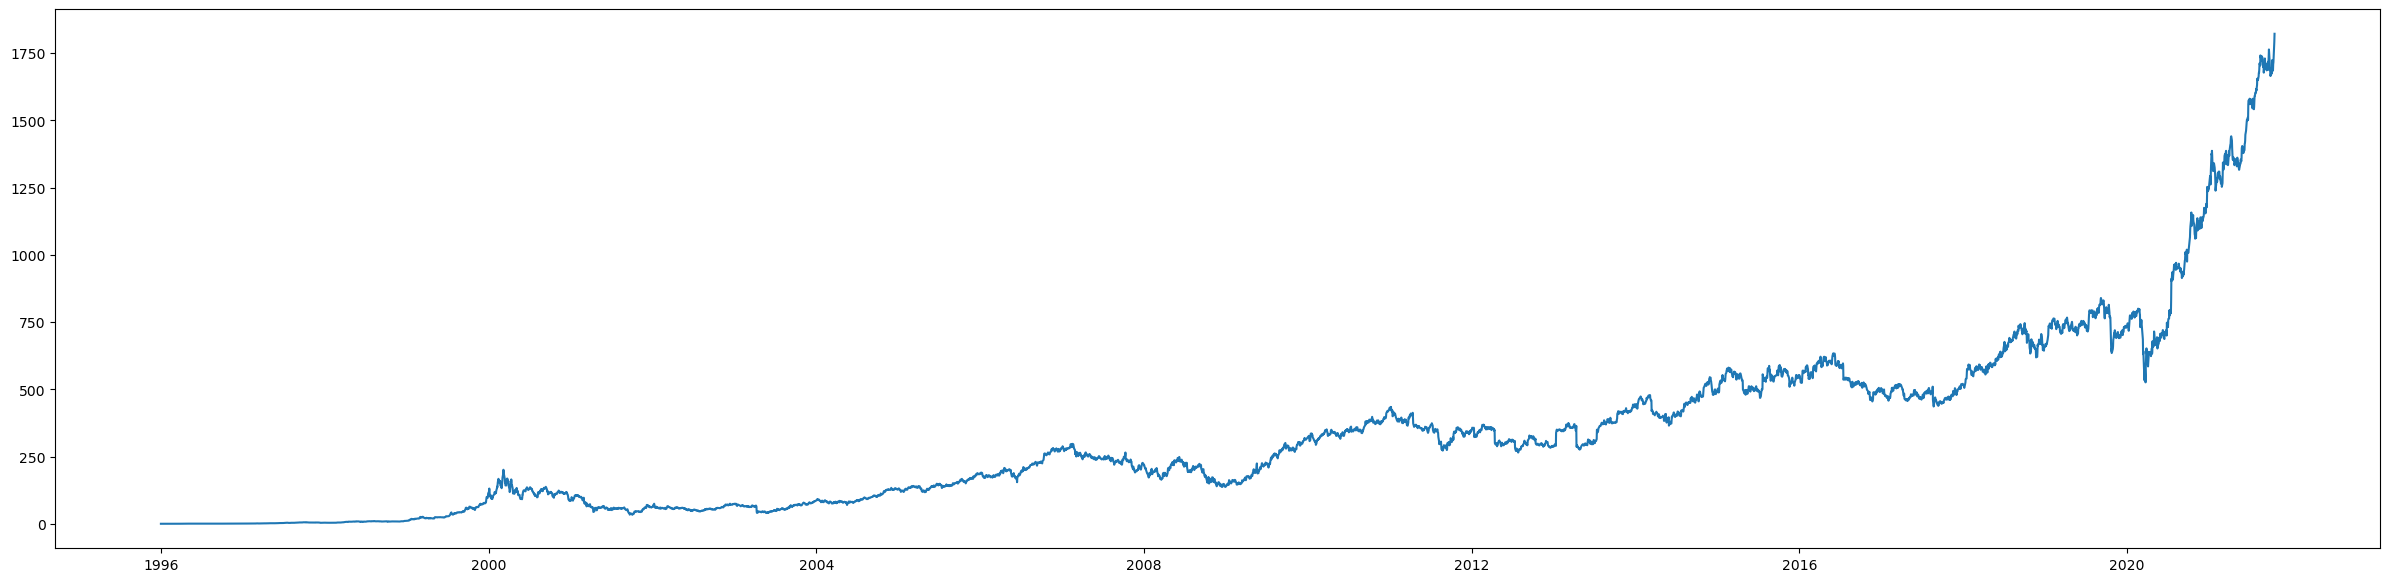

In [698]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,7))
plt.plot(data.index,data['Close'])
plt.show()

In [699]:
train_size=int(len(data)*0.8)
train,test=data.iloc[:train_size],data.iloc[train_size:len(data)]
train.shape,test.shape

((5189, 8), (1298, 8))

In [700]:
train.head(5)

,Open,High,Low,Close,Adj Close,Volume,Day,DayOfWeek
Date,,,,,,,,
1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0,1,0
1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0,2,1
1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0,3,2
1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0,4,3
1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0,5,4


In [701]:
test.head(5)

,Open,High,Low,Close,Adj Close,Volume,Day,DayOfWeek
Date,,,,,,,,
2016-07-14,597.500000,598.025024,582.000000,588.125000,513.401306,7413328.0,14,3
2016-07-15,594.750000,594.950012,526.000000,536.275024,468.139069,61484126.0,15,4
2016-07-18,538.625000,542.450012,527.575012,540.974976,472.241760,14332824.0,18,0
2016-07-19,544.299988,545.000000,537.049988,543.474976,474.424164,10404644.0,19,1
2016-07-20,535.000000,544.950012,535.000000,541.549988,472.743713,9822896.0,20,2


In [702]:
from sklearn.preprocessing import MinMaxScaler

rs_data = MinMaxScaler()
rs_target = MinMaxScaler()

target=data['Close']
data.drop(columns=['Close'],inplace=True)

train.loc[:,data.columns]=rs_data.fit_transform(train.loc[:,data.columns].to_numpy())
train['Close']=rs_target.fit_transform(train[['Close']].to_numpy())
test.loc[:,data.columns]=rs_data.fit_transform(test.loc[:,data.columns].to_numpy())
test['Close']=rs_target.fit_transform(test[['Close']].to_numpy())

C:\Users\nilay\AppData\Local\Temp\ipykernel_9772\3650821266.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.03333333 0.06666667 ... 0.33333333 0.36666667 0.4       ]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  train.loc[:,data.columns]=rs_data.fit_transform(train.loc[:,data.columns].to_numpy())
C:\Users\nilay\AppData\Local\Temp\ipykernel_9772\3650821266.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.25 0.5  ... 0.   0.25 0.5 ]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  train.loc[:,data.columns]=rs_data.fit_transform(train.loc[:,data.columns].to_numpy())
C:\Users\nilay\AppData\Local\Temp\ipykernel_9772\3650821266.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [703]:
train.head(5)

,Open,High,Low,Close,Adj Close,Volume,Day,DayOfWeek
Date,,,,,,,,
1996-01-01,0.000050,0.000049,0.000124,0.000053,0.000042,0.000740,0.000000,0.00
1996-01-02,0.000050,0.000052,0.000128,0.000048,0.000038,0.000740,0.033333,0.25
1996-01-03,0.000056,0.000052,0.000136,0.000056,0.000045,0.000370,0.066667,0.50
1996-01-04,0.000044,0.000046,0.000124,0.000048,0.000038,0.001111,0.100000,0.75
1996-01-05,0.000033,0.000029,0.000113,0.000033,0.000027,0.000185,0.133333,1.00


In [704]:
test.head(5)

,Open,High,Low,Close,Adj Close,Volume,Day,DayOfWeek
Date,,,,,,,,
2016-07-14,0.114629,0.110897,0.112401,0.109297,0.085392,0.040663,0.433333,0.75
2016-07-15,0.112627,0.108686,0.070990,0.071872,0.053761,0.371076,0.466667,1.00
2016-07-18,0.071779,0.070936,0.072155,0.075264,0.056628,0.082947,0.566667,0.00
2016-07-19,0.075910,0.072769,0.079161,0.077069,0.058154,0.058942,0.600000,0.25
2016-07-20,0.069141,0.072733,0.077645,0.075679,0.056979,0.055387,0.633333,0.50


In [705]:
import numpy as np
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [706]:
time_steps=200

x_train, y_train = create_dataset(train, train['Close'], time_steps)
x_test, y_test = create_dataset(test, test['Close'], time_steps)

x_train.shape,x_test.shape

((4989, 200, 8), (1098, 200, 8))

In [707]:
x_train[0][0]

array([5.01598756e-05, 4.86066025e-05, 1.24040010e-04, 5.29131951e-05,
       4.22838584e-05, 7.40379120e-04, 0.00000000e+00, 0.00000000e+00])

#### **Model Creation**

In [708]:
import keras

model = keras.Sequential()

# Convolutional layer with fewer filters
model.add(keras.layers.Conv1D(filters=8, kernel_size=5,
                              strides=1, padding="causal",
                              activation="relu",
                              input_shape=(x_train.shape[1], x_train.shape[2])))

# Single Bidirectional LSTM layer with fewer units
model.add(keras.layers.Bidirectional(
    keras.layers.LSTM(units=32)
))

# Dropout layer to prevent overfitting
model.add(keras.layers.Dropout(rate=0.25))

# Simplified Dense layers
model.add(keras.layers.Dense(units=20, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='relu'))

# Output layer
model.add(keras.layers.Dense(units=1))

# Compile the model
model.compile(loss=keras.losses.MeanSquaredError(),
              optimizer='adam',
              metrics=["mse", "accuracy"])


c:\Users\nilay\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Fitting the Model**

In [709]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.35,
    shuffle=False,
    verbose=1
)

Epoch 1/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 33s 215ms/step - accuracy: 0.0000e+00 - loss: 0.0025 - mse: 0.0025 - val_accuracy: 0.0000e+00 - val_loss: 0.1396 - val_mse: 0.1396
Epoch 2/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 24s 231ms/step - accuracy: 0.0000e+00 - loss: 0.0129 - mse: 0.0129 - val_accuracy: 0.0000e+00 - val_loss: 0.1215 - val_mse: 0.1215
Epoch 3/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 25s 244ms/step - accuracy: 0.0000e+00 - loss: 0.0181 - mse: 0.0181 - val_accuracy: 0.0000e+00 - val_loss: 0.1259 - val_mse: 0.1259
Epoch 4/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 37s 203ms/step - accuracy: 0.0000e+00 - loss: 0.0083 - mse: 0.0083 - val_accuracy: 0.0000e+00 - val_loss: 0.1408 - val_mse: 0.1408
Epoch 5/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 34s 137ms/step - accuracy: 0.0000e+00 - loss: 0.0033 - mse: 0.0033 - val_accuracy: 0.0000e+00 - val_loss: 0.1042 - val_mse: 0.1042
Epoch 6/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - accuracy: 0.0000e+00 - loss: 0.0017 - mse: 0.0017 - val_accuracy: 0.0000e+00 - val_loss:

### **Prediction and Tables**

In [710]:
x_test.shape

(1098, 200, 8)

In [711]:
x_test[0][0]

array([0.11462882, 0.11089741, 0.11240109, 0.10929661, 0.08539245,
       0.04066321, 0.43333333, 0.75      ])

In [712]:
pred=model.predict(x_test)
y_train_inv=rs_target.inverse_transform(y_train.reshape(1,-1))
y_test_inv=rs_target.inverse_transform(y_test.reshape(1,-1))
pred=rs_target.inverse_transform(pred.reshape(1,-1))

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step


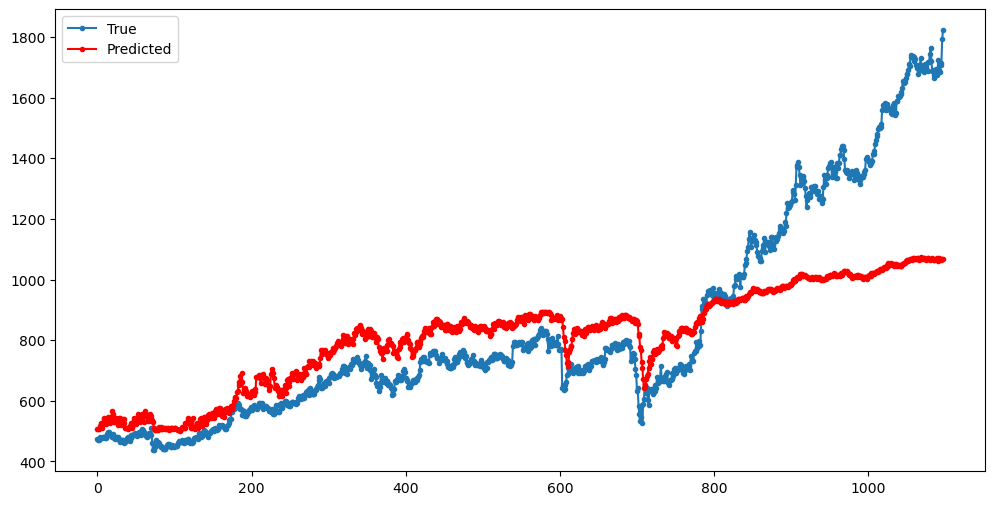

In [713]:
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Plot the true and predicted values
plt.plot(y_test_inv.flatten(), marker='.', label='True')
plt.plot(pred.flatten(), 'r', marker='.', label='Predicted')

# Add legend
plt.legend()

# Display the plot
plt.show()

#### **Tabular Format Representation**

In [714]:
data_file_path = os.path.join(config.BASE_DIR, 'dataset', 'INFY.NS.csv')
data_orig=pd.read_csv(data_file_path, parse_dates=['Date'],index_col='Date')

In [715]:
# Step 2: Drop null values
data_orig.dropna(inplace=True)

In [716]:
data_orig['Day'] = data.index.day
data_orig['DayOfWeek'] = data.index.dayofweek

In [717]:
data_orig.head(5)

,Open,High,Low,Close,Adj Close,Volume,Day,DayOfWeek
Date,,,,,,,,
1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0,1,0
1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0,2,1
1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0,3,2
1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0,4,3
1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0,5,4


In [719]:
import numpy as np
import pandas as pd
from tabulate import tabulate

# Assuming 'data' DataFrame and 'rs_target' (your scaler) exist and contain the relevant columns

def min_max_scale(values, min_val, max_val):
    return (values - min_val) / (max_val - min_val)

def extract_date_values(date_str, offset_days=0):
    # Convert string to datetime
    date = pd.to_datetime(date_str) + pd.Timedelta(days=offset_days)
    
    # Check if date exists in DataFrame
    if date in data_orig.index:
        # Extract the values
        row = data_orig.loc[date]
        extracted_values = np.array([[row['Open'], row['High'], row['Low'], row['Adj Close'],
                                      row['Volume'], row['Day'], row['DayOfWeek'], row['DayOfWeek'] / 7]])
        
        # Define min and max values for scaling
        min_vals = np.array([data_orig['Open'].min(), data_orig['High'].min(), data_orig['Low'].min(), data_orig['Adj Close'].min(),
                             data_orig['Volume'].min(), 1, 0, 0])
        max_vals = np.array([data_orig['Open'].max(), data_orig['High'].max(), data_orig['Low'].max(), data_orig['Adj Close'].max(),
                             data_orig['Volume'].max(), 31, 6, 1])
        
        # Scale the values
        scaled_values = min_max_scale(extracted_values, min_vals, max_vals)
        
        # Get actual close price
        actual_close_price = row['Close']
        
        return scaled_values, actual_close_price, date
    else:
        return None, None, None

def print_prediction(date_str, offset_days=0):
    values, actual_close, date = extract_date_values(date_str, offset_days)
    if values is not None:
        values = np.reshape(values, (1, 1, 8))
        predicted_price_scaled = model.predict(values)[0][0]  # Assuming model.predict returns a nested list or array
        
        # Inverse transform the predicted price
        predicted_price = rs_target.inverse_transform(np.array([[predicted_price_scaled]]))[0][0]
        
        delta = predicted_price - actual_close
        delta_percentage = abs((delta / actual_close) * 100)

        return [date.strftime('%Y-%m-%d'), f"{predicted_price:.2f}", f"{actual_close:.2f}", f"{delta:.2f}", f"{delta_percentage:.2f}%"]
    else:
        return None

# Test the function
date_str = input("Enter Date in Format (yyyy-mm-dd):")

# Prepare the table data
table_data = []
for offset in [1, 7, 14]:
    result = print_prediction(date_str, offset_days=offset)
    if result is not None:
        table_data.append(result)

# Define the headers
headers = ["Date", "Predicted Value", "Actual Value", "Delta", "Delta%"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))


+--------+-------------------+----------------+---------+----------+
| Date   | Predicted Value   | Actual Value   | Delta   | Delta%   |
+========+===================+================+=========+==========+
+--------+-------------------+----------------+---------+----------+
